# Load an artist portrait model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

artist_path = "AF_dataset/Amedeo_Modigliani/"
mu_artist = np.load(artist_path + "mean.npy")
cov_artist = np.load(artist_path + "cov.npy")

In [2]:
# sample an offset vector from the distribution
v_artist = np.random.multivariate_normal(mu_artist, cov_artist)
x_offset = v_artist[0:68]
y_offset = v_artist[68:]

# Load Natural Image and Landmarks

In [3]:
natural_img = "300w/indoor_037.png"
natural_pts = "300w/indoor_037.pts"

import os
import cv2
import numpy as np

with open(natural_pts) as pts_file:
    data = pts_file.readlines()[3:68+3]
    data = [np.array(line.split(), dtype=float) for line in data]
    landmarks = np.array(data) # x is cols y is rows
    
# print(landmarks)
control_points = landmarks.copy()
    
# print(landmarks.shape)
image = cv2.imread(natural_img)
im_rows = image.shape[0]
im_cols = image.shape[1]

print(control_points.shape)

(68, 2)


# Match and Perturb Landmarks

In [4]:
# normalize and center landmarks
x_landmarks = landmarks[:,0]
y_landmarks = landmarks[:,1]

# print(x_landmarks)
# print(y_landmarks)

x_landmarks /= im_cols
y_landmarks /= im_rows

# print(x_landmarks)
# print(y_landmarks)
nose_x = x_landmarks[33]
nose_y = y_landmarks[33]

x_landmarks -= nose_x
y_landmarks -= nose_y

print(x_landmarks)
print(y_landmarks)

[-2.19486228e-01 -2.14186826e-01 -2.09701796e-01 -1.98625150e-01
 -1.77014371e-01 -1.37796407e-01 -9.35604790e-02 -5.46742515e-02
 -6.66826347e-03  3.37401198e-02  5.95497006e-02  8.37221557e-02
  1.00526946e-01  1.07247904e-01  1.10099401e-01  1.13747305e-01
  1.15204790e-01 -1.42982036e-01 -1.22029940e-01 -9.24107784e-02
 -6.03149701e-02 -2.99592814e-02  1.12023952e-02  3.91520958e-02
  5.94718563e-02  8.75473054e-02  1.03465868e-01 -4.84670659e-03
 -1.01676647e-03  4.68502994e-03  1.11724551e-02 -4.11724551e-02
 -1.92778443e-02  0.00000000e+00  1.83377246e-02  3.31796407e-02
 -1.19229940e-01 -1.00689820e-01 -7.94922156e-02 -5.15425150e-02
 -7.87413174e-02 -9.90095808e-02  2.36000000e-02  4.82826347e-02
  6.80407186e-02  8.33329341e-02  6.71221557e-02  4.76371257e-02
 -7.28886228e-02 -4.68538922e-02 -1.81281437e-02  1.36646707e-03
  1.94359281e-02  4.02287425e-02  5.29832335e-02  3.94407186e-02
  1.95365269e-02 -4.62275449e-04 -1.91616766e-02 -5.31125749e-02
 -5.87652695e-02 -1.87568

In [5]:
# add offset
l_x = x_landmarks + x_offset
l_y = y_landmarks + y_offset
print(l_x)
print(l_y)

l_x += nose_x
l_y += nose_y

[-3.34123521e-01 -3.09076097e-01 -2.78969214e-01 -2.40096932e-01
 -1.92234829e-01 -1.24688647e-01 -8.04240638e-02 -4.70466028e-02
  1.28835091e-02  5.61109957e-02  6.40258774e-02  6.83908635e-02
  8.46783979e-02  9.50206992e-02  9.80593588e-02  9.70803348e-02
  9.23611864e-02 -2.65896842e-01 -2.26926160e-01 -1.93612004e-01
 -1.62004915e-01 -1.35810405e-01 -5.16361661e-02 -2.13623321e-02
 -4.83347354e-03  3.14629784e-02  6.78570242e-02 -6.72232692e-02
 -4.74876291e-02 -2.64376652e-02 -1.25865755e-02 -4.74149022e-02
 -2.95702965e-02 -3.66712177e-09  2.28439141e-02  3.62400107e-02
 -2.27270679e-01 -1.98741906e-01 -1.52359576e-01 -1.12394660e-01
 -1.62174168e-01 -2.05952918e-01 -1.98211145e-02  1.57906017e-02
  5.06259774e-02  8.44955304e-02  5.73333431e-02  2.59734738e-02
 -4.52900879e-02 -2.70117473e-02 -1.19299859e-02  1.76591196e-03
  1.27492689e-02  2.34038371e-02  2.50997793e-02  3.04942002e-02
  2.48060881e-02  7.33259917e-03 -1.13427967e-02 -4.29130125e-02
 -3.02267754e-02 -8.69391

In [6]:
# map the landmarks back into the original image
l_x *= im_cols
l_y *= im_rows

print(l_x)
print(l_y)

[180.6018597  201.51645939 226.65570643 259.11406178 299.07891775
 355.47997986 392.44090676 420.31108663 470.35273008 506.4476814
 513.05660761 516.70137103 530.30146228 538.93728387 541.4745646
 540.65707953 536.71659065 237.57113653 270.11165608 297.92897698
 324.32089588 346.19331197 416.47880133 441.75745267 455.55904959
 485.86658695 516.25561518 403.46357021 419.94282971 437.51954959
 449.08520945 420.0035567  434.90380243 459.59499694 478.66966829
 489.85540896 269.82398321 293.64550857 332.3747543  365.74545902
 324.17956968 287.62431318 443.04436942 472.78015238 501.86769112
 530.14876789 507.46834145 481.2828506  421.77777659 437.04019098
 449.63346178 461.06953649 470.24063954 479.137204   480.55331569
 485.05765713 480.30808355 465.71772031 450.12376474 423.7626346
 434.35564252 452.33558039 468.25849287 479.89314027 472.8907138
 478.95601747 466.52466092 452.96871114]
[167.60944855 222.00302759 279.74023674 334.01150792 385.20469043
 417.39076871 445.85846093 477.99059052

# Apply Style Transfer With TPS Interpolation

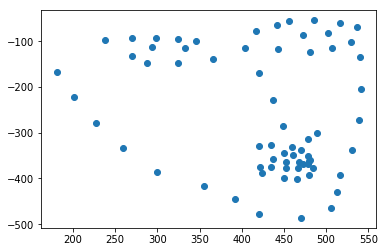

In [9]:
target_points = np.zeros((68,2))
target_points[:,0] = l_x
target_points[:,1] = l_y
plt.figure(1)
plt.scatter(l_x, -l_y)

In [8]:
matches = list()
for ipoint in range(0, control_points.shape[0]):
    matches.append(cv2.DMatch(ipoint, ipoint, 0))
    
# print(control_points)
# print(target_points)
    
target_image = image.copy()
control_image = image.copy()
    
for i in range(control_points.shape[0]):
    control = np.round(control_points[i])
    target = np.round(target_points[i])
    control_image = cv2.circle(control_image, (int(control[0]), int(control[1])), radius = 0, color=(0,255,0), thickness = 3)
    target_image = cv2.circle(target_image, (int(target[0]), int(target[1])), radius = 0, color = (0,255,0), thickness = 3)
    
# cv2.imshow("control", control_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# cv2.imshow("target", target_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
    
wrap_control_points = np.array([control_points])
wrap_target_points = np.array([target_points])
    
tps = cv2.createThinPlateSplineShapeTransformer()
tps.estimateTransformation(wrap_target_points, wrap_control_points, matches)
warped = tps.warpImage(image)
for i in range(target_points.shape[0]):
    control = np.round(control_points[i])
    target = np.round(target_points[i])
#     control_image = cv2.circle(image, (int(control[0]), int(control[1])), radius = 0, color=(0,255,0), thickness = 3)
    warped = cv2.circle(warped, (int(target[0]), int(target[1])), radius = 0, color = (0,255,0), thickness = 3)

cv2.imshow("warped", warped)
cv2.waitKey(0)
cv2.destroyAllWindows()